___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# DataFrames

DataFrames are the workhorse of pandas and are directly inspired by the R programming language. We can think of a DataFrame as a bunch of Series objects put together to share the same index. Let's use pandas to explore this topic!

In [33]:
import pandas as pd
import numpy as np
import locale
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Define Moeda Brasileira numeros R$ 1.000,00
locale.setlocale( locale.LC_ALL, '' )
#locale.currency( g, grouping = True )

'Portuguese_Brazil.1252'

In [34]:
from numpy.random import randn
np.random.seed(101)

In [35]:
pd.options.display.float_format = 'R${:,.2f}'.format

In [53]:
df = pd.read_csv('')

# xml,empresa,NF,data,CNPJ,cidade,bairro,UF,cod,produto,qty,unidade,preco

In [39]:
#df.drop('xml',axis=1,inplace=True)

In [54]:
df.head()

,cliente,NF,data,CNPJ,cidade,bairro,UF,cod,descricao,QTY,unidade,preco
0,NF-E EMITIDA EM AMBIENTE DE HOMOLOGACAO - SEM ...,4,2014-08-29,27833615002018,RIO DE JANEIRO,CASIMIRO DE ABREU,RJ,20002,ALHO CEBOLA PICADINHO S/SAL 180GR,1,UN,R$2.77
1,NF-E EMITIDA EM AMBIENTE DE HOMOLOGACAO - SEM ...,5,2014-08-29,9309021000168,RIO DE JANEIRO,VILA NOVA DE CAMPOS,RJ,10002,ALECRIM 15GR,1,UN,R$1.11
2,NF-E EMITIDA EM AMBIENTE DE HOMOLOGACAO - SEM ...,6,2014-08-29,9309021000168,ANGRA DOS REIS,VILA NOVA DE CAMPOS,RJ,10001,ACAFRAO 15GR,12,UN,R$9.72
3,NF-E EMITIDA EM AMBIENTE DE HOMOLOGACAO - SEM ...,6,2014-08-29,9309021000168,ANGRA DOS REIS,VILA NOVA DE CAMPOS,RJ,10002,ALECRIM 15GR,1,UN,R$1.11
4,NF-E EMITIDA EM AMBIENTE DE HOMOLOGACAO - SEM ...,6,2014-08-29,9309021000168,ANGRA DOS REIS,VILA NOVA DE CAMPOS,RJ,10009,CALDO DE CARNE COM ERVAS FINAS 60GR,1,UN,R$1.43


In [7]:
#produtos = df.produto.unique()
#newdf = df[(df['col1']>2) & (df['col2']==444)]
#df.loc[:, ['cod', 'produto']]

In [9]:
#type(produtos)

In [55]:
# Cria uma coluna com o resultado
dadosNF = df[['data','NF']].groupby(['data','NF']).size().reset_index(name='Produtos')

In [58]:
#dadosNF.head()

In [ ]:
#dados = df[['CNPJ','preco']].groupby(['CNPJ']).size().reset_index(name='Volume')


In [75]:
# Compras por Empresa no Periodo
comprasEmpresa = df[['CNPJ','preco']].groupby(['CNPJ']).sum().reset_index()
comprasEmpresa.tail()

,CNPJ,preco
669,73237570000173,"R$4,417.43"
670,73915597000178,"R$46,103.56"
671,73915597000259,"R$112,072.84"
672,74048224000100,"R$2,319.11"
673,74126707000185,"R$1,344.10"


In [76]:
comprasEmpresa = comprasEmpresa.sort_values(by=['preco']).reset_index(drop=True)
comprasEmpresa.tail()

,CNPJ,preco
669,19068286000175,"R$287,622.97"
670,29840154000173,"R$300,708.01"
671,12434859000198,"R$362,693.84"
672,15116388000168,"R$367,559.08"
673,12360891000176,"R$474,946.97"


In [96]:
#clientes = df[['CNPJ','cliente','cidade','bairro','UF']]
clientes = pd.read_csv('Supra_clientes.csv')#('NFe-SupraAlimentos.csv')
clientes= clientes.drop_duplicates()

In [97]:
len(clientes) #.head(10)

674

In [98]:
clientes.head(20)

,CNPJ,cliente,UF,cidade,bairro
0,7394215000183,GILVERLAN BARBOSA SOUTO EPP,BA,NOVA VICOSA,VICOSA
1,23673682000107,ALINE FAVERO DO NASCIMENTO,BA,PRADO,SAO BRAS
2,9190998000109,SUPERMERCADO PAGANINI LTDA,ES,ANCHIETA,OLIVEIRA
3,35994433000275,MERCADO HORTICAXIXE LTDA EPP,ES,ARACRUZ,BARRA DO RIACHO
4,8357136000165,SUPERMERCADO VALLIN LTDA,ES,ARACRUZ,BARRA DO SAHY
5,39792205000192,SUPERMERCADO KINKAS LTDA,ES,ARACRUZ,CENTRO
6,31759699000363,COMERCIAL DEVENS LTDA.,ES,ARACRUZ,CENTRO
7,31759699000444,COMERCIAL DEVENS LTDA,ES,ARACRUZ,COQUEIRAL
8,9379562000162,COMERCIAL KINAO LTDA - EPP.,ES,ARACRUZ,GUARANA
9,9622180000118,KINKAS COMERCIO VAREJISTA LTDA.,ES,ARACRUZ,VILA NOVA


In [99]:
comprasTotais = pd.merge(comprasEmpresa, clientes, how='inner', on=['CNPJ']).drop_duplicates(['CNPJ'], keep='last')

In [100]:
len(comprasTotais) #.head(50)

674

In [102]:
comprasTotais.head(10)

,CNPJ,preco,cliente,UF,cidade,bairro
0,9309021000168,R$24.52,NF-E EMITIDA EM AMBIENTE DE HOMOLOGACAO - SEM ...,RJ,ANGRA DOS REIS,VILA NOVA DE CAMPOS
1,42294744000106,R$115.58,CASA DE AVES NOVA BRASILIA LTDA - EPP,RJ,RIO DE JANEIRO,BONSUCESSO
2,27103140000141,R$129.93,ANDRADE E MEIRA PANIFICADORA LTDA - ME,RJ,ARMACAO DOS BUZIOS,CENTRO
3,2101672000119,R$134.91,COMERCIAL LESTE MINAS LTDA,MG,AIMORES,CENTRO
4,26098410000100,R$139.16,AUTO SERVICO CASA SHOW LTDA - ME,ES,VIANA,UNIVERSAL
5,35995646000130,R$162.00,SUPERMERCADO DOIS IRMAOS LTDA,ES,COLATINA,VILA NOVA
6,35994433000275,R$162.00,MERCADO HORTICAXIXE LTDA EPP,ES,ARACRUZ,BARRA DO RIACHO
7,9612750000199,R$162.73,PADARIA E MERCEARIA G&J LTDA - M,RJ,DUQUE DE CAXIAS,JARDIM IMBARIE
8,10572977000137,R$166.80,POSTO DAS PIZZAS EIRELI - ME,RJ,RIO DE JANEIRO,BONSUCESSO
9,24639414000123,R$167.00,LUCAS CIPRESTE DE VARGAS - ME,ES,PIUMA,JARDIM MAILY


In [104]:
comprasTotais.to_csv('C:\Mettricx\Projetos\SupraAlimentos\PowerBI\Supra_TotalClientes.csv',encoding='utf-8', index=False)

In [13]:
# Maior_Compra
g = float("{0:.2f}".format(dados['preco'].max())) 
Maior_Compra = locale.currency( g, grouping = True ) 
Maior_Compra

'R$474.946,97'

In [14]:
# Menor_Compra
g = float("{0:.2f}".format(dados['preco'].min())) 
Menor_Compra = locale.currency( g, grouping = True )

Menor_Compra


'R$24,52'

In [15]:
# Compra_Media
g = float("{0:.2f}".format(dados['preco'].mean())) 
Compra_Media = locale.currency( g, grouping = True )
(float(dados['preco'].mean()))

17326.016275964375

In [16]:
# Total de Venda
g = float("{0:.2f}".format(dados['preco'].sum())) 
Total_Compra = locale.currency( g, grouping = True )
Total_Compra

'R$11.677.734,97'

In [17]:
# Número de Clientes
Num_Clientes = len(dados)
Num_Clientes

674

In [19]:
#dados.describe()

In [20]:
nivel_0 =  0.50 * (dados['preco'].mean())
nivel_0


8663.008137982188

In [21]:
nivel_1 =  1.50 * (dados['preco'].mean())
nivel_1

25989.024413946565

In [16]:
#dados.loc[0:5,['Campo1','Campo2']]

In [ ]:
# dados.loc[:,'col1':'col2'].applymap(float)

In [22]:
def Media(x):
    if(x <= nivel_0):
        tot = 0.2
    elif(x <= nivel_1):
        tot = 0.8
    else:
        tot = 1
    return tot   


In [23]:
dados['status'] = dados['preco'].map(lambda x: Media(x))

In [24]:
bons = dados[dados['status']==1]

In [25]:
medios = dados[dados['status']==0.8]

In [26]:
pequenos = dados[dados['status']==0.2]

In [27]:
len(bons)

105

In [28]:
medios.head()
m=medios.sort_values(by='preco', ascending=False)

In [29]:
len(pequenos)

443

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [31]:
plt.rcParams['figure.figsize']=(15,6)

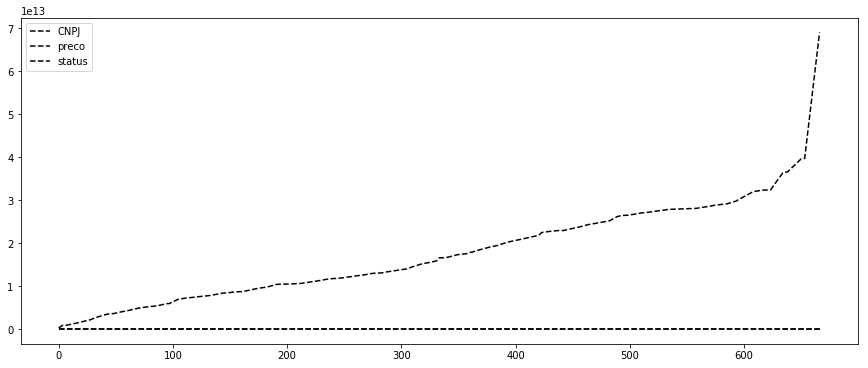

In [32]:
 plt.figure(); medios.plot(style='k--', label='Series');

In [58]:
a=[]
c = range(126)

In [59]:
type(c)

range

In [49]:
ind

[]

In [50]:
len(m)

126

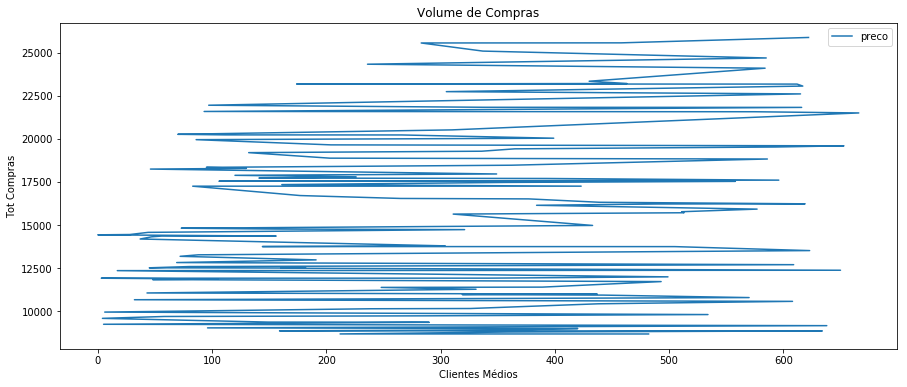

In [43]:
graficoMedios = m[['preco']].plot.line()
graficoMedios.set_xlabel('Clientes Médios')
graficoMedios.set_ylabel('Tot Compras')
graficoMedios.set_title('Volume de Compras')

In [ ]:
dados.preco

In [ ]:
dados['media']= dados['preco'] #dados['media'].apply(Media(dados['preco']))

In [ ]:
dados['media'].apply(Media(dados['preco']))

In [ ]:
k=0 
for j in dados:
    print['preco']
    if(dados['preco'] <= nivel_0):
        tot_0 += dados['preco']
    elif(dados['preco'] <= nivel_1):
        tot_1 += dados['preco']
    else:
        tot_2 += dados['preco']

        

In [ ]:
dados.head()

In [ ]:
y = dados['preco'] <= dados['preco'].mean()

In [ ]:
type(y)

In [ ]:
def media(x):
    

In [ ]:
type(dados)

In [ ]:
n_groups = 674

means_men = y
std_men   = 0


fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.7

opacity = 0.4
error_config = {'ecolor': '0.3'}

rects1 = ax.bar(index, means_men, bar_width,
                alpha=opacity,
                color='b', 
                yerr=std_men, 
                error_kw=error_config
                )

ax.set_xlabel('CNPJ')
ax.set_ylabel('Venda')
ax.set_title('Volume Vendas por Cliente')
ax.set_xticks(index + bar_width )
ax.set_xticklabels(dados)
ax.legend()

fig.tight_layout()

plt.rcParams["figure.figsize"] = (30,20)
plt.axhline(y=22580, zorder=0)
plt.plot()
plt.show()

In [ ]:
fig = plt.figure(); ax = fig.add_subplot(1, 1, 1)
ax.plot(randn(1000).cumsum(), 'k', label='one')

In [ ]:
clientes = df[['CNPJ','cliente','cidade','bairro','UF']]
clientes= clientes.drop_duplicates()

In [ ]:
clientes= clientes.drop_duplicates()

In [ ]:
clientes

In [ ]:
clientes= clientes.drop_duplicates()
clientes.to_csv('clientes.csv')

In [ ]:
clientes.sort_values(by=['UF', 'cidade'])

In [ ]:
#cliCompras = df['preco'].groupby(df['CNPJ']).sum()
cliCompras10 = df['preco'].groupby(df['CNPJ'])
#df.groupby(['CNPJ', 'preco']).preco.sum()

#grouped_multiple_column = df.groupby(['CNPJ','preco'])['preco']
#lista = df[['CNPJ','preco']]

In [ ]:
#cliCompras10.index.names

In [ ]:
type(cliCompras10).sum()

In [ ]:
cliCompras10.groups

In [ ]:
#cliCompras10).sum()
for name, group in cliCompras10:
    print(name)
    print(group.shape)

In [ ]:
cliCompras10.loc[0]['175479000105']
#df.loc[0]['A'])

In [ ]:
#grouped_multiple_column


In [ ]:
p = lista['preco'].groupby(df['CNPJ']).sum()

In [ ]:
p

In [ ]:
clienteCompras = cliCompras.to_frame()

In [ ]:
type(clienteCompras )

In [ ]:
clienteCompras.tail()

In [ ]:
clientesCompras['preco']=

In [ ]:
clienteCompras.columns.values


In [ ]:
totVendas = clienteCompras.sum()

In [ ]:
(totVendas)
#f=locale.currency( g, grouping = True )

In [ ]:
for row in clienteCompras.itertuples():
    print("c1 :",row.preco)

In [ ]:
j=0
for i in clienteCompras.index()
        print(cliente.iloc[j])
        j += 1

In [ ]:
clienteCompras['preco']

In [ ]:
g = float("{0:.2f}".format(tot)) f=locale.currency( g, grouping = True )
clienteCompras.sort_values(by='preco', ascending=False)

In [ ]:
for key in grouped:
    print(key)

In [ ]:
#df['cod']
#df.loc(163689)
prod = df[['cod', 'produto']]

In [ ]:
prod

In [ ]:
type(prod)

In [ ]:
produto= prod.drop_duplicates()

In [ ]:
(produto)

In [ ]:
produto.to_csv('produtos.csv')

In [ ]:
a=s.values

In [ ]:
len(a)

In [ ]:
#df.loc[:, ['cod', 'produto']]
df[df.cod=='01.0002']

In [ ]:
A = df['A'].copy()
A.sort_values(inplace=True)

In [ ]:
produtos.sort()

In [ ]:
j=0
for i in produtos:
    print(produtos[j])
    j += 1

In [ ]:
df.head()

## Selection and Indexing

Let's learn the various methods to grab data from a DataFrame

In [ ]:
df[['preco']] = df[['preco']].apply(pd.to_numeric)

In [ ]:
df = df.drop(df_UN, axis=1)

In [ ]:
tot = df['preco'].sum()

In [ ]:
g = float("{0:.2f}".format(tot)) f=locale.currency( g, grouping = True )

In [ ]:
g

In [ ]:

f=locale.currency( g, grouping = True )

In [ ]:
f

In [ ]:
tot.

In [ ]:
msk = df.dtypes == np.float64 #df.loc[:, msk]
msk

In [ ]:
# Numero de Clientes
a=df.groupby(['CNPJ','NF','preco'])

In [ ]:
#dados = olx.groupby(olx['timestamp'].str[8:10]).size()
#df.groupby(['NF']).sum()
#df.groupby(['CNPJ', 'NF'])['preco'].agg('sum')
#a=df.groupby(['CNPJ',df['data']])['NF'].unique() #.count() #agg('sum') .str[0:7]
cnpjCompras = df.groupby(['CNPJ'])['preco'].agg('sum')

In [ ]:
type(cnpjCompras)

In [ ]:
cnpjCompras.count()

In [ ]:
f=locale.currency( cnpjCompras.min(), grouping = True )

In [ ]:
f

In [ ]:
df.groupby(['CNPJ','NF']).size()

In [ ]:
type(a)

In [ ]:
a


In [ ]:
df

In [ ]:
# Pass a list of column names
#Select * from df
lista = df[['data','CNPJ','cidade']]

In [ ]:
(lista)

In [ ]:
# Select Descrição da linha 100
# loc pega pela Chave
df['descricao'].loc[100]

In [ ]:
# Select * where linha = 100
#linha = df.iloc[1:10] # Pega da index 1 a 9
#linha = df.iloc[10]   # Pega a linha 10
linha = df.iloc[:10] 

df.iloc[4514]

In [ ]:
df[df['produto']=='106']

In [ ]:
(linha)

In [ ]:
df[df['W']>0]['Y']     #df[(df['W']>0) & (df['Y'] > 1)]

In [ ]:
linha.Bairro
#linha.CNPJ
#linha.Preco

In [ ]:
# Select * from df where Descricao = kkkkk
#df[df['Descricao']=='CALDO DE CARNE COM ERVAS FINAS 60GR']
df[df['Preco'] == 'UN']

In [ ]:
mask = (df['Preco'] == 'UN')
#& (df['date'] <= '2000-6-10')
#print np.shape((calit2_dataFrame.loc[mask]))
supra_df = df.loc[mask]

In [ ]:
supra_df

In [ ]:
(df['data'].str[0:7])

In [ ]:
df[(df['Cod']=='01.0009') & (df['Data'].str[0:4] == '2014')]

In [ ]:
#Select Cidade from df where descrição = kkkkk
cidades = df[df['Descricao']=='CALDO DE CARNE COM ERVAS FINAS 60GR'][['Cidade','Bairro','CNPJ']]

In [ ]:
cidades.sort_values(by='CNPJ',ascending=0)

In [ ]:
df.set_index(['Cidade'])

In [ ]:
df.columns = df.columns.to_series().apply(lambda x: x.strip())

In [ ]:
df[['Preco','Qty']] = df[['Preco','Qty']].apply(pd.to_numeric)

In [ ]:
df.pivot_table(values='Preco',index=['Data', 'NF']) #,columns=['C']

In [ ]:
# SQL Syntax (NOT RECOMMENDED!)
df.W

DataFrame Columns are just Series

In [ ]:
type(df['W'])

**Creating a new column:**

In [ ]:
df['new'] = df['W'] + df['Y']

In [ ]:
df

** Removing Columns**

In [ ]:
df.drop('new',axis=1)

In [ ]:
# Not inplace unless specified!
df

In [ ]:
df.drop('new',axis=1,inplace=True)

In [ ]:
df

Can also drop rows this way:

In [ ]:
df.drop('E',axis=0)

** Selecting Rows**

In [ ]:
df.loc['A']

Or select based off of position instead of label 

In [ ]:
df.iloc[2]

** Selecting subset of rows and columns **

In [ ]:
df.loc['B','Y']

In [ ]:
df.loc[['A','B'],['W','Y']]

### Conditional Selection

An important feature of pandas is conditional selection using bracket notation, very similar to numpy:

In [ ]:
df

In [ ]:
df>0

In [ ]:
df[df>0]

In [ ]:
df[df['W']>0]

In [ ]:
df[df['W']>0]['Y'] 

In [ ]:
df[df['W']>0][['Y','X']]

For two conditions you can use | and & with parenthesis:

In [ ]:
df[(df['W']>0) & (df['Y'] > 1)]

## More Index Details

Let's discuss some more features of indexing, including resetting the index or setting it something else. We'll also talk about index hierarchy!

In [ ]:
df

In [ ]:
# Reset to default 0,1...n index
df.reset_index()

In [ ]:
newind = 'CA NY WY OR CO'.split()

In [ ]:
df['States'] = newind

In [ ]:
df

In [ ]:
df.set_index('States')

In [ ]:
df

In [ ]:
df.set_index('States',inplace=True)

In [ ]:
df

## Multi-Index and Index Hierarchy

Let us go over how to work with Multi-Index, first we'll create a quick example of what a Multi-Indexed DataFrame would look like:

In [ ]:
# Index Levels
outside = ['G1','G1','G1','G2','G2','G2']
inside = [1,2,3,1,2,3]
hier_index = list(zip(outside,inside))
hier_index = pd.MultiIndex.from_tuples(hier_index)

In [ ]:
hier_index

In [ ]:
df = pd.DataFrame(np.random.randn(6,2),index=hier_index,columns=['A','B'])
df

Now let's show how to index this! For index hierarchy we use df.loc[], if this was on the columns axis, you would just use normal bracket notation df[]. Calling one level of the index returns the sub-dataframe:

In [ ]:
df.loc['G1']

In [ ]:
df.loc['G1'].loc[1]

In [ ]:
df.index.names

In [ ]:
df.index.names = ['Group','Num']

In [ ]:
df

In [ ]:
df.xs('G1')

In [ ]:
df.xs(['G1',1])

In [ ]:
df.xs(1,level='Num')

# Great Job!